In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit as cf
from astropy import units as u

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Answer Number (1):

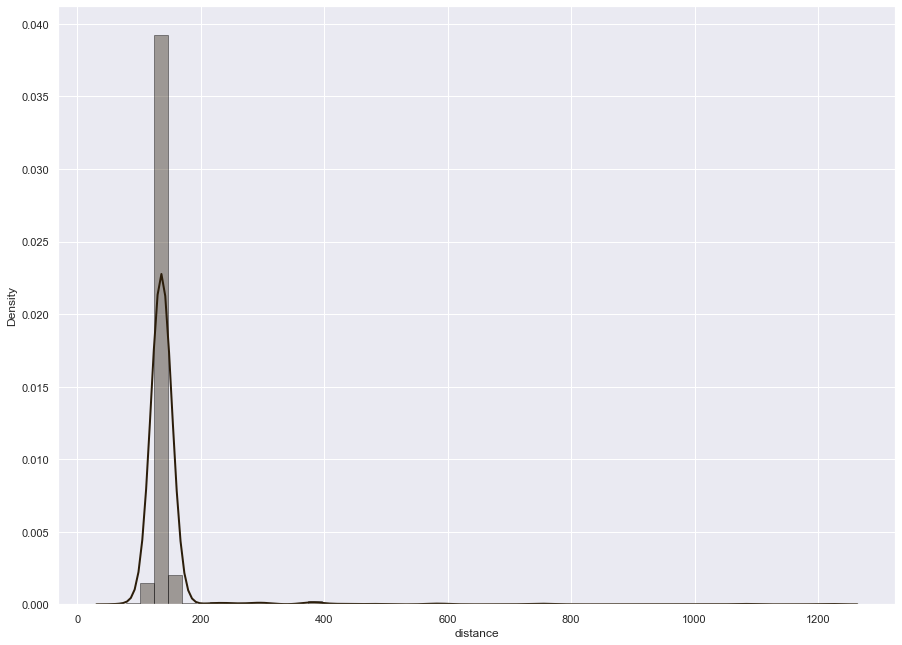

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The mean distance of the Pleiades star cluster is: 444.36412634191964 lyr


In [3]:
cluster_data = pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv")
cluster_data["distance"] = 1000/cluster_data["plx"]

#Plotting the density plot in Searborn
sns.set(rc={'figure.figsize':(15,11)})
sns.distplot(cluster_data['distance'], hist=True, kde=True, color = '#2b1d0A', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
plt.show()

#Calculation of mean distance
distarr = np.asarray(cluster_data["distance"])
distarr = np.delete(distarr, np.where(distarr > 200))

cluster_dist = distarr.mean() * u.parsec
print("~"*122)
print("The mean distance of the Pleiades star cluster is:", cluster_dist.to(u.lightyear))


# Answer Number (2):

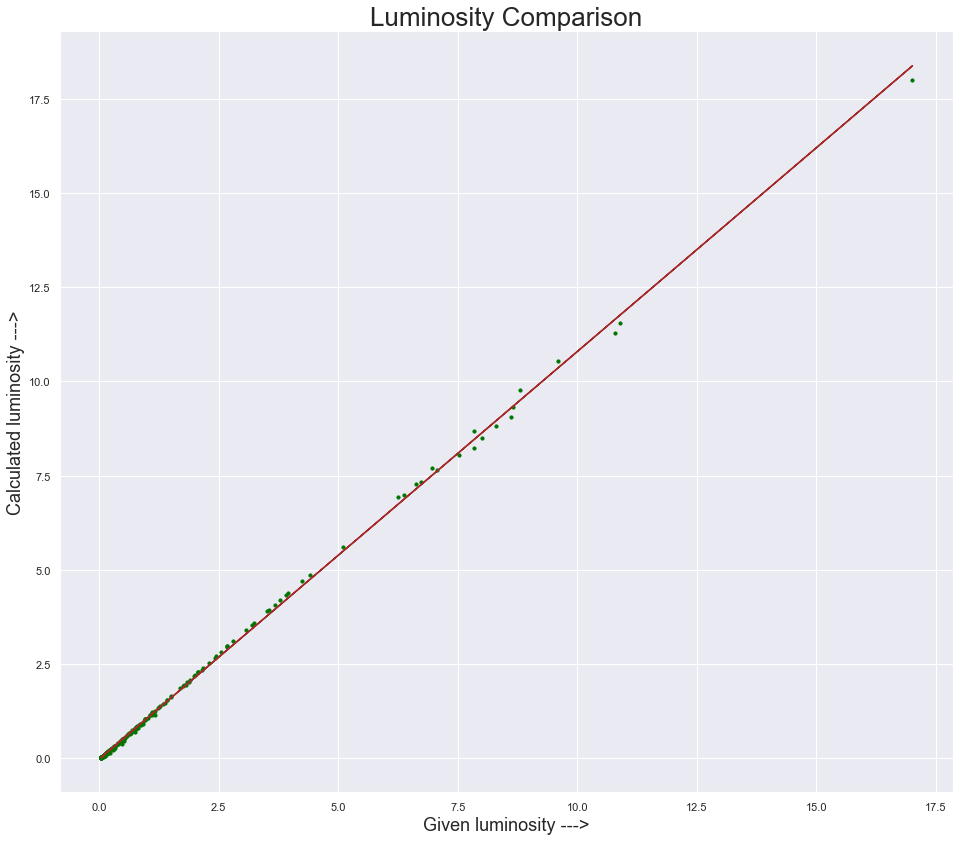

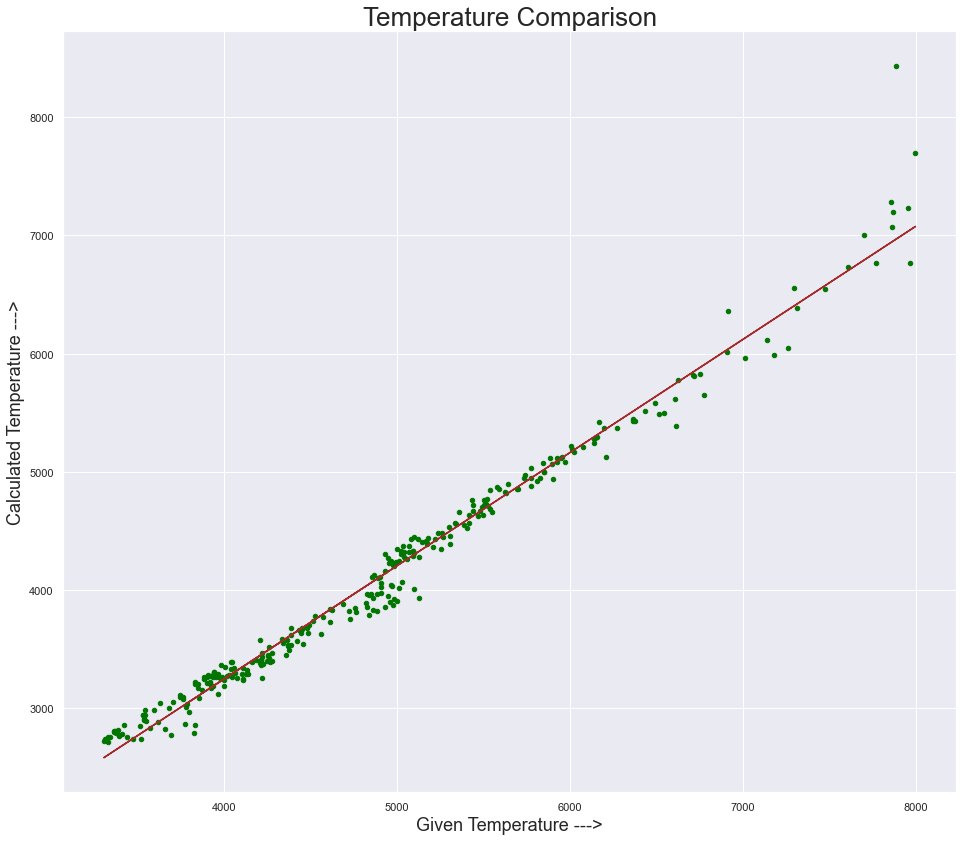

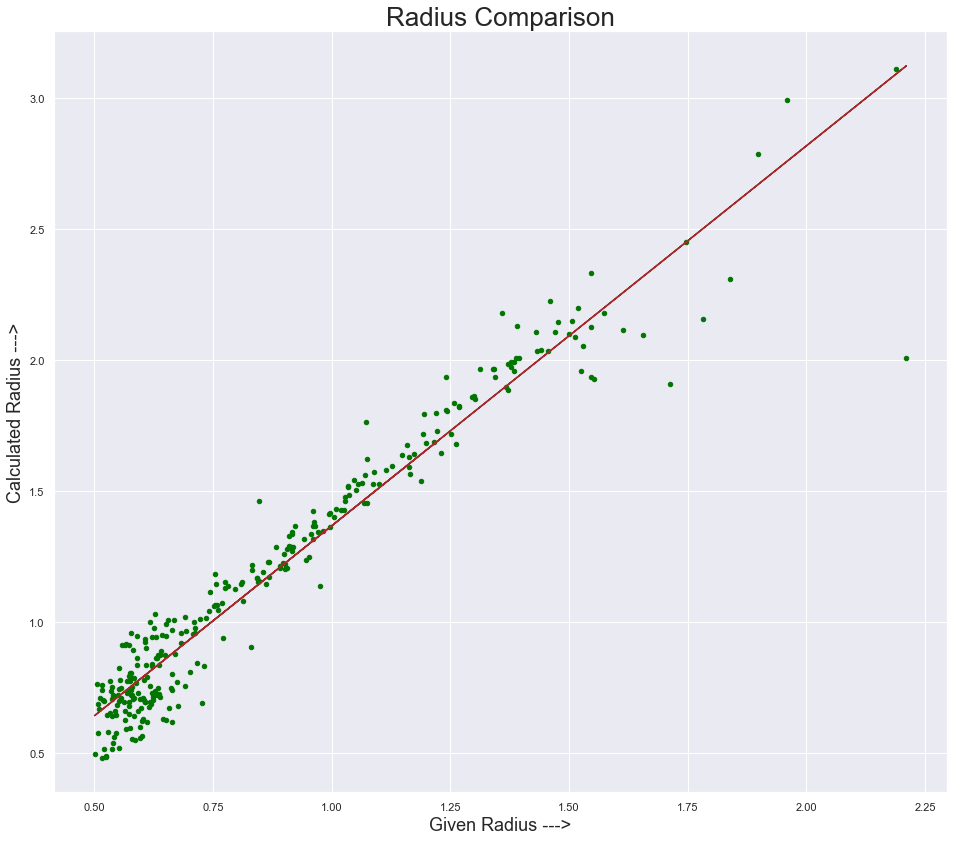

In [4]:
cluster_data["Absolute magnitude"] = cluster_data["gmag"] + 5 - 5*np.log10(cluster_data["distance"])
cluster_data["Calculated Luminosity"] = 10**((4.77 - cluster_data["Absolute magnitude"])/2.5)

new = cluster_data.dropna()

new["Error term in Luminosity"] = abs(new["Calculated Luminosity"] - new["lum_val"])

new["Calculated Temperature(K)"] = 5601/((new["bp_rp"] + 0.4)**(2/3))
new["Error term in Temperature(K)"] = abs(new["Calculated Temperature(K)"] - new["teff_val"])

new["Star radius"] = ((new["Calculated Luminosity"]) **(0.5))/((new["Calculated Temperature(K)"]/5800)**2)
new["Error term in Radius"] = abs(new["Star radius"] - new["radius_val"])


def f(x,m,c):
    return m*x + c

#Luminosity error visualization
calc_lum = np.asarray(new['Calculated Luminosity'])
given_lum = np.asarray(new['lum_val'])
p_opt1, p_cov1 = cf(f,given_lum,calc_lum)

plt.figure(figsize = (16,14))
plt.title("Luminosity Comparison", size = 26)
plt.scatter(given_lum, calc_lum, s = 10, c = '#007500')
plt.plot(given_lum, f(given_lum, p_opt1[0], p_opt1[1]), color = 'brown')
plt.xlabel("Given luminosity --->", fontsize = '18')
plt.ylabel("Calculated luminosity --->", fontsize = '18')
plt.show()

#Temperature error visualization
calc_temp = np.asarray(new['Calculated Temperature(K)'])
given_temp = np.asarray(new['teff_val'])
p_opt2, p_cov2 = cf(f,given_temp,calc_temp)

plt.figure(figsize = (16,14))
plt.title("Temperature Comparison", size = 26)
plt.scatter(given_temp, calc_temp, s = 20, c = '#007500')
plt.plot(given_temp, f(given_temp, p_opt2[0], p_opt2[1]), color = 'brown')
plt.xlabel("Given Temperature --->", fontsize = '18')
plt.ylabel("Calculated Temperature --->", fontsize = '18')
plt.show()

#Radius error visualization
calc_rad = np.asarray(new['Star radius'])
given_rad = np.asarray(new['radius_val'])
p_opt3, p_cov3 = cf(f, given_rad, calc_rad)

plt.figure(figsize = (16,14))
plt.title("Radius Comparison", size = 26)
plt.scatter(given_rad, calc_rad, s = 20, c = '#007500')
plt.plot(given_rad, f(given_rad, p_opt3[0], p_opt3[1]), color = 'brown')
plt.xlabel("Given Radius --->", fontsize = '18')
plt.ylabel("Calculated Radius --->", fontsize = '18')
plt.show()

In [5]:
new

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,distance,Absolute magnitude,Calculated Luminosity,Error term in Luminosity,Calculated Temperature(K),Error term in Temperature(K),Star radius,Error term in Radius
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,286.809906,8.396202,0.035442,0.026890,2967.981218,829.018782,0.718941,0.142003
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,154.004943,6.985679,0.129936,0.026332,3538.852567,917.312433,0.968267,0.305037
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,373.821332,8.590890,0.029624,0.021320,2856.065168,973.944832,0.709810,0.197186
7,12.179868,55.676693,23.502644,8.294176,1.369455,0.165852,4861.0350,0.574189,120.566527,6.773734,0.157945,0.007906,3828.592774,1032.442226,0.912075,0.337886
10,14.584626,55.786541,23.251838,4.447532,1.873214,0.085902,4112.1074,0.577466,224.843799,7.825221,0.059967,0.025935,3239.704383,872.403017,0.784876,0.207410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,9.779877,56.710653,23.239006,6.497724,0.746530,2.140879,5945.6665,1.378947,153.900040,3.843683,2.347073,0.206194,5112.995279,832.671221,1.971372,0.592424
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,173.016572,5.662324,0.439613,0.074221,3779.218443,747.536557,1.561662,0.396222
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986,138.380855,2.481108,8.232975,0.393962,6767.605218,1195.590082,2.107484,0.636498
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280,479.601745,7.098074,0.117158,0.024530,3631.846532,811.153468,0.872944,0.237663


# Answer Number (3):

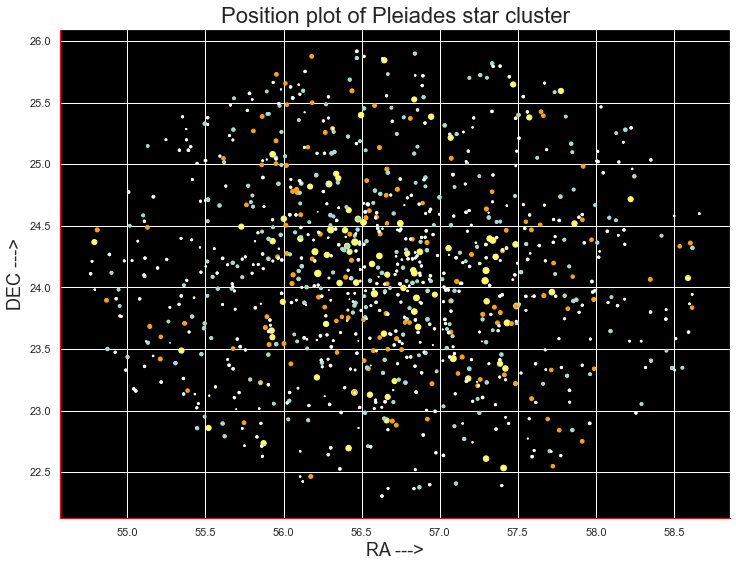

In [6]:
brightness = np.asarray(cluster_data["gmag"].max() - cluster_data["gmag"])
ra = np.asarray(cluster_data["ra"])
dec = np.asarray(cluster_data["dec"])

plt.figure(figsize = (12,9))
plt.title("Position plot of Pleiades star cluster", size = 22)
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')
plt.scatter(ra[brightness >= 10], dec[brightness >= 10], s = 2.5*brightness[brightness >= 10], c = '#FFFF66')
plt.scatter(ra[brightness <10], dec[brightness <10], s = 1.7*brightness[brightness <10], c = '#FFA500')
plt.scatter(ra[brightness <7], dec[brightness <7], s = 1.7*brightness[brightness <7], c = '#95E0E8')
plt.scatter(ra[brightness <4], dec[brightness <4], s = 1.3*brightness[brightness <4], c = 'w')
plt.xlabel("RA --->", fontsize = '18')
plt.ylabel("DEC --->", fontsize = '18')
plt.show()

# Answer Number (4):

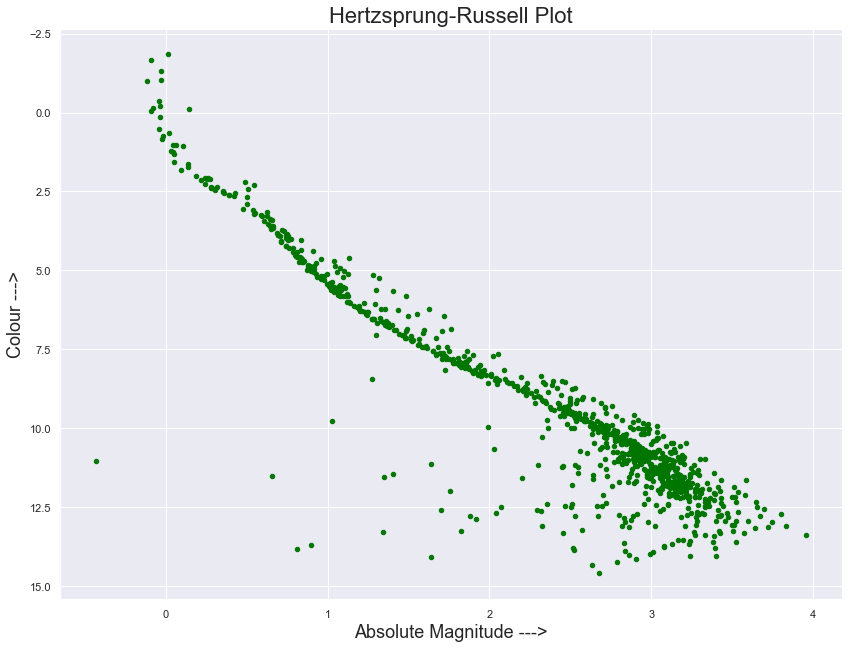

In [7]:
M = np.asarray(cluster_data["Absolute magnitude"])
color = np.asarray(cluster_data['bp_rp'])

plt.figure(figsize = (14,10.5))
plt.title("Hertzsprung-Russell Plot", size = 22)
plt.scatter(color, M, s = 20, c = '#007500')
plt.ylabel("Colour --->", fontsize = '18')
plt.xlabel("Absolute Magnitude --->", fontsize = '18')
plt.gca().invert_yaxis()
plt.show()